In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import f
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Create a dataframe using 'groupid', 'error type 1', 'error type 2', 'error type 3' and the final 'score'. Dataset contains 30 samples/ students divided into 3 groups.

In [ ]:
data = np.array([[1,7,4,27, 144.6], [2,30,26,24 ,33.2], [3,36,4,27, 86.6], [1,12,20,26, 86.8], [3,34,7,29, 81.2], [1,0,18,26,116.8], 
             [3,27,18,1, 67.8], [1,28,5,27, 99.6], [3,20,19,18, 75.4], [2,26,22,16, 54.8], [3,14,4,7, 134.6], [2, 33,13,18, 67.4],[1,27,17,11,68.8],
                 [3,18,24,10, 66], [2,38,7,14,76.2], [1,28,18,7,64.6],[2,29,16,29,64.2], [3,27,25,22,42.6], [1,4,4,20, 152], [3,21,12,17, 94.6],
                 [2,27,17,5,70],  [2,38,26,8, 20.4], [1,14,9,17, 117.6],  [2,39,30,2, 7.6], [3,8,12,10, 122], [1,1,19,6, 115.8], [2,24,24,24,51.2], [2,16,27,12, 60.6],
                [1,5, 26,2, 87.6],  [3,23,29,25,38]]) 


df = pd.DataFrame(data, columns = ['groupid', 'er1','er2','er3', 'score'])

# turn groupid, er1,er2,er3 columns into intiger numbers
df1= df['groupid'].astype(int)
df2= df['er1'].astype(int)
df3= df['er2'].astype(int)
df4= df['er3'].astype(int)
df5= df['score'].astype(float)

#define the final dataframe
df= pd.concat([df1, df2, df3,df4,df5], axis=1)

df.head()
#print(df)

,groupid,er1,er2,er3,score
0,1,7,4,27,144.6
1,2,30,26,24,33.2
2,3,36,4,27,86.6
3,1,12,20,26,86.8
4,3,34,7,29,81.2


- Create a new dataframe named **"df_a"** that contains only 'groupid' and 'error3' columns. 

In [ ]:
df_a = df[['groupid', 'er3']]

#sort the dataframe
df_a= df_a.iloc[df_a['groupid'].astype(int).argsort()]
                       
df_a.head()

,groupid,er3
0,1,27
3,1,26
25,1,6
5,1,26
7,1,27


-  Count frequency in order to ensure that all group ids have the same number of samples.

In [ ]:
frequency_df = df_a.groupby('groupid').count()
frequency_df

,er3
groupid,
1,10
2,10
3,10


- Plot the sample data grouped into 3 groups for type 3 error.


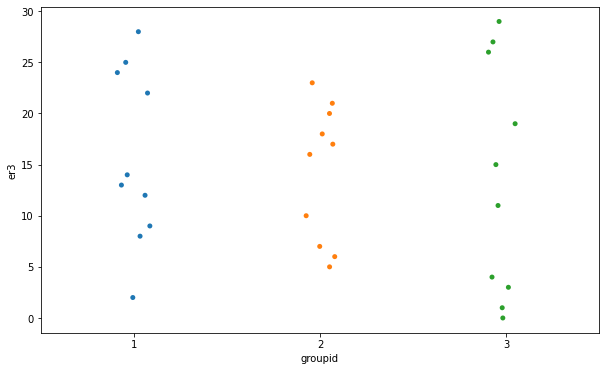

In [ ]:
plt.figure(figsize=(10,6))
#sort 'er3' values from 0 to 30
ax=sns.stripplot(y= df_a['er3'].astype(int).argsort(), x= df_a['groupid'], data=df_a) 
plt.show()

**-  BOXPLOTS**

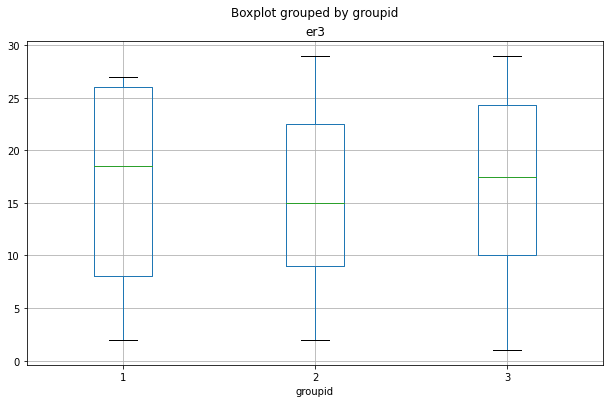

In [ ]:
df_a.boxplot(by = 'groupid', column =['er3'], grid = True, figsize=(10, 6))
plt.show()

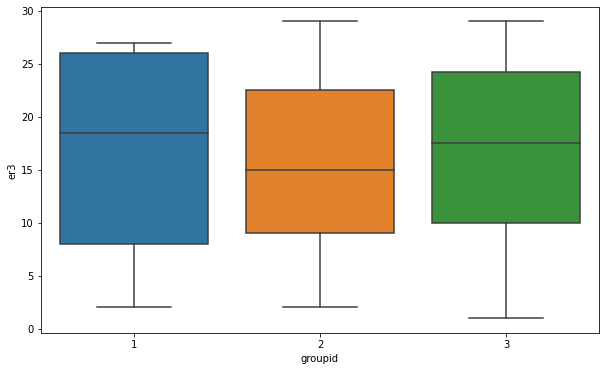

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='er3', x= 'groupid', data=df_a)
plt.show()

### **Anova test**

Α) Υπάρχει κάποια ομάδα παιδιών που διαφοροποιείται ως προς τη μέση τιμή των λαθών είδους 1 (er1);

- 3 groups
- 10 samples per group
- 10 values of *error 1* per group

In [ ]:
groups = df_a.groupby('groupid')

numbers = groups.describe(include='all')
numbers

NameError: ignored

In [ ]:
#make a dataframe that contains only group ids and number of 'errors type 1' per sample
df_er1= df[['groupid', 'er1']]
df_er1= df_er1.iloc[df_er1['groupid'].astype(int).argsort()]

alpha = 0.05 # level of significance

number_of_groups = len(df_er1['groupid'].unique())
size_of_sample  = df_er1.shape[0]
print("number_of_groups = ", number_of_groups)
print("size_of_sample =",size_of_sample)

model = ols('er1 ~ C(groupid)', df_er1).fit() #data representation
anovaResults = anova_lm(model, type=2) #calculations based on previous representations
print(anovaResults)
print()
if anovaResults['PR(>F)'][0] < alpha:
    print("One of the 3 groups differs.")
else:
    print("H0 cannot be rejected")

In [ ]:
#plot F- distribution with F-statistic and F-critical values just to confirm anova test
x_axis = np.arange(0, 10, 0.001)

dfn, dfd = 2, 27

plt.plot(x_axis, f.pdf(x_axis,dfn,dfd))

plt.axvline(x=9.044172, color='r', linestyle= '--') 
plt.axvline(x=2.46, color='g', linestyle= '--')  


Β) Υπάρχει κάποια ομάδα παιδιών που διαφοροποιείται ως προς τη μέση τιμή των λαθών είδους 2 (er2);
- 3 groups
- 10 samples per group
- 10 values of *error 2* per group

In [ ]:
#make a dataframe that contains only group ids and number of 'errors type 2' per sample
df_er2= df[['groupid', 'er2']]
df_er2= df_er2.iloc[df_er2['groupid'].astype(int).argsort()]

number_of_groups = len(df_er2['groupid'].unique())
size_of_sample  = df_er2.shape[0]
print("number_of_groups = ", number_of_groups)
print("size_of_sample =",size_of_sample)

model = ols('er2 ~ C(groupid)', df_er2).fit()
anovaResults = anova_lm(model, type=2)
print(anovaResults)
print()
if anovaResults['PR(>F)'][0] < alpha:
    print("One of the 3 groups differs.")
else:
    print("H0 cannot be rejected")

Γ) Υπάρχει κάποια ομάδα παιδιών που διαφοροποιείται ως προς τη μέση τιμή των λαθών είδους 3 (er3);
- 3 groups
- 10 samples per group
- 10 values of *error 3* per group


In [ ]:
# use 'df_a' with 'error 3' column as before

number_of_groups = len(df_a['groupid'].unique())
size_of_sample  = df_a.shape[0]
print("number_of_groups = ", number_of_groups)
print("size_of_sample =",size_of_sample)

model = ols('er3 ~ C(groupid)', df_a).fit()
anovaResults = anova_lm(model, type=2)
print(anovaResults)
print()
if anovaResults['PR(>F)'][0] < alpha:
    print("One of the 3 groups differs.")
else:
    print("H0 cannot be rejected")

###  "**Results**":  As we can notice from the previous three Anova tests, there is a group that differs over mean value in type 1 error.  
Let' s find which group differs.

Exercise 3


---

# *T* - *independent* test
- All groups are independent.
- We need to examine type 1 error. In type 1 error we can reject null hypothesis as we can see from Anova analysis test.
- Tukey test for examine which group differs from others. Pairwise comparisons:
    - Group 1- Group 2
    - Group 1- Group 3
    - Group 2- Group 3

In [ ]:
n=3
m=2
X = math.factorial(n) / (math.factorial(m) * math.factorial(n-m))
print(X)

#number of groups
test_list = [1, 2, 3]

#possible combinations
res = list(combinations(test_list, m))

print("All possible ", m, "-tuples : " + str(res)) 

num_tests = 3 #t- indepented tests
alpha = 0.05
PNTI = math.pow((1-alpha),num_tests)
print("PNTI = ", PNTI)
print("PTI = ", 1 - PNTI)

3.0
All possible  2 -tuples : [(1, 2), (1, 3), (2, 3)]
PNTI =  0.8573749999999999
PTI =  0.1426250000000001


In [ ]:
#tukey method
tukey = pairwise_tukeyhsd(endog=df_er1['er1'],
                          groups=df_er1['groupid'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     17.4  0.001   7.208 27.592   True
     1      3     10.2 0.0498   0.008 20.392   True
     2      3     -7.2 0.2052 -17.392  2.992  False
---------------------------------------------------


# *As we can see from tukey test,  group 1 differs from group 2 and group 3 as to mean value.*
Let's confirm results with a boxplot. Group 1 has much smaller mean value from other groups.

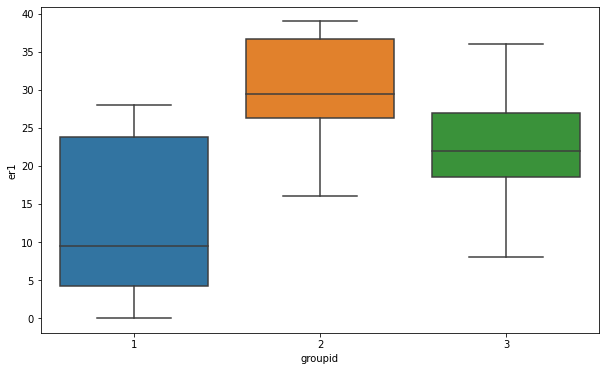

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='er1', x= 'groupid', data=df_er1)
plt.show()

- **LINEAR MODEL**





1.  Error1 (dep variable) Vs Score (Indep. variable)
2.  Error2 (dep variable) Vs Score (Indep. variable)
3.  Error3 (dep variable) Vs Score (Indep. variable)





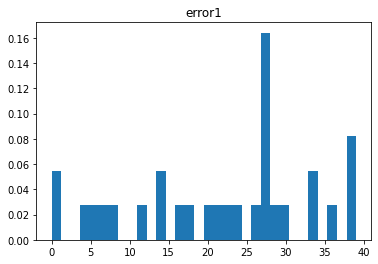

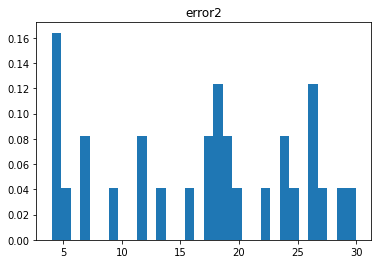

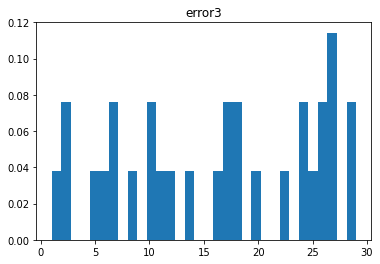

In [ ]:
plt.hist(df['er1'], bins=32, density=True, cumulative=False)
plt.title("error1")
plt.show()

plt.hist(df['er2'], bins=32, density=True, cumulative=False)
plt.title("error2") 
plt.show()


plt.hist(df['er3'], bins=32, density=True, cumulative=False)
plt.title("error3")
plt.show()

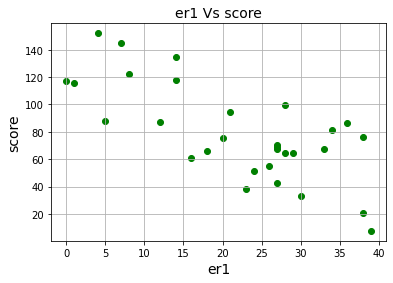

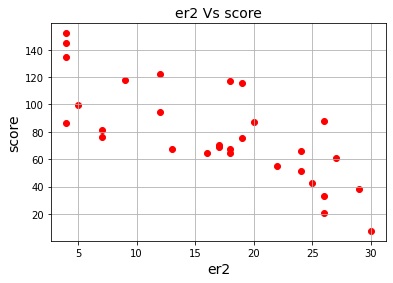

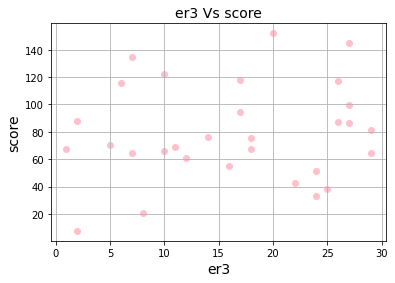

,groupid,er1,er2,er3,score
0,1,7,4,27,144.6
1,2,30,26,24,33.2
2,3,36,4,27,86.6
3,1,12,20,26,86.8
4,3,34,7,29,81.2
5,1,0,18,26,116.8
6,3,27,18,1,67.8
7,1,28,5,27,99.6
8,3,20,19,18,75.4
9,2,26,22,16,54.8


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

plt.scatter(df['er1'], df['score'], color='green')
plt.title('er1 Vs score', fontsize=14)
plt.xlabel('er1', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['er2'], df['score'], color='red')
plt.title('er2 Vs score', fontsize=14)
plt.xlabel('er2', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['er3'], df['score'], color='pink')
plt.title('er3 Vs score', fontsize=14)
plt.xlabel('er3', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(True)
plt.show()

df

- As we can easily see, we are not able to have a linear model (especially in type 3 error).

In [ ]:
import statsmodels.api as sm

X1 = df[["er1", "er2", "er3"]]
Y1 = df["score"]

X1 = sm.add_constant(X1) # adding a constant
model1 = sm.OLS(Y1, X1).fit()
predictions1 = model1.predict(X1) 
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.152e+30
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:14:51   Log-Likelihood:                 872.03
No. Observations:                  30   AIC:                            -1736.
Df Residuals:                      26   BIC:                            -1730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.0000   4.25e-14   4.14e+15      0.0

# **Ανάλυση:**
Απο τον παραπάνω πίνακα θα μπορούσαμε να πάρουμε πολλές πληροφορίες για το μοντέλο Γραμμικής Παλινδρόμησης που αναπτύξαμε. Αρχικά σύμφωνα με τον παραπάνω τύπο:
 **score= a * er1 + b * er2 + c * er3 + d**  οι τιμές έχουν ώς εξής:

        - a (bias) =  176.0000  
        - b = -2.0000 
        - c = -3.0000 
        - d = -0.2000 

Αυτό που προκαλεί ιδιαίτερη εντύπωση απο τον παραπάνω σταστιστικό πίνακα του μοντέλου μας είναι η τιμή του P> |t| = 0.000 για όλα τα coefficients αλλά και το R-squared που ισούται με 1,000, δηλαδή την βέλτιστη τιμή. 

Στην περίπτωση του P value, η χαμηλή τιμή αυτού δείχνει οτι υπάρχει μια ισχυρή συχέτηση ανάμεσα στα coefficients και στις μεταβλητές στόχο. 

Στη συνέχεια, κοιτάζοντας την τιμή R², έχουμε 1. Επομένως, το 100% της μεταβλητότητας των "y" μεταβλητών εξαρτάται απο τις τιμές των ανεξάρτητων μεταβλητών. Mε άλλα λόγια, η μεταβλητότητα των scores εξαρτάται σε απόλυτο βαθμό απο τις τιμές των errors. 

Οι τιμές p -value και R-squared μετρούν διαφορετικά πράγματα. Η τιμή p δείχνει ότι υπάρχει μια σημαντική σχέση που περιγράφεται από το μοντέλο και το R squared μετρά τον βαθμό στον οποίο τα δεδομένα εξηγούνται από το μοντέλο.Σύμφωνα με αυτή τη σκέψη, μπορούμε να πούμε πως και οι 3 μεταβλητές (δηλαδή τα 3 είδη λαθών) είναι στατιστικά σημαντικές γι' αυτό και η τιμή του R squared είναι 1.Aκόμα, αν παρατηρήσουμε το t-statistic θα μπορούσαμε να δούμε πως είναι αρκετά υψηλό, κάτι που επιβεβαιώνει την σκέψη οτι τα δεδομένα μου είναι statistically significant. Αυτό, βέβαια, οδηγεί και σε overfitting καθώς θα είναι αρκετά δύσκολο για το μοντέλο μου να προβλέψει νέες τιμές στα scores σε νέα δεδομένα (δηλαδή νέα error values). To overfitting υποδεικνύει και η μεγάλη τιμή που παίρνει το bias(176.0000). 

